In [12]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import KLZFitPy as KF
import importlib
import glob, sys, pylab,  matplotlib, time, scipy.optimize, math,pickle
import json
import scipy.stats
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt



Average Neutrino Energy in sample: 4.75MeV
/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures/plotNeutrinoPDF.pdf


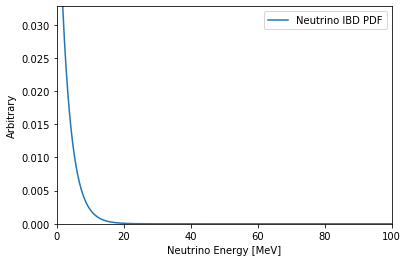

In [74]:
importlib.reload(KF)

# Setup some constants for the analysis
dataPaths         = KF.DataPaths('')      # set paths to look for information, like cross section tables. No data imported yet.
Const             = KF.Constants()        # Setup the physical constants, like average neutrino mass
Const.setSeed(21)                         # Set a seed for the random number generator, like generating random time stamps on the neutrinos.
Const.NeutrinoEmissionRange = [-500,500] 
Const.LiveTime    = 3600*24 # Set the analysis livetime
FitParameters     = KF.FitParameters()    # Setup the default systematic uncertainties.
KLZFit            = KF.KLZFit(dataPaths,Const,FitParameters) # make an object
neutrinopdf = np.exp(-KLZFit.Constants.NeutrinoCenterEnergies/3.) 
KLZFit.setNeutrinoEnergyPDF(neutrinopdf)
KLZFit.plotNeutrinoEnergyPDF(log = False)
realization = KLZFit.getNeutrinoRealization(Rate = 15/KLZFit.Constants.LiveTime)  # Rate is the expected neutrino rate. 
KLZFit.setNeutrinos(realization) # Set the realization as the data, [time, energy, -, +]



Average Neutrino Energy in sample: 4.75MeV
/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures/plotNeutrinoPDF.pdf


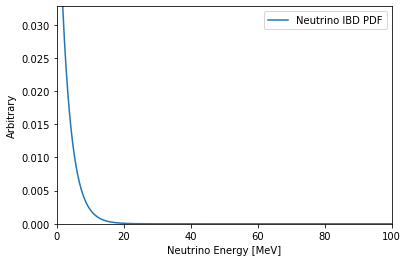

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures//plotAllEvents.pdf


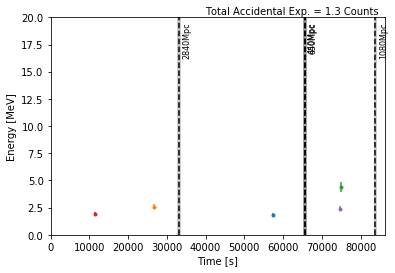

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures/TOF.pdf


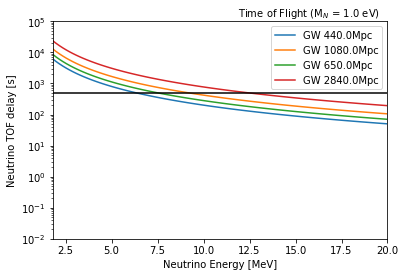

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures//calcFeldmanCousins_GW150914.pdf


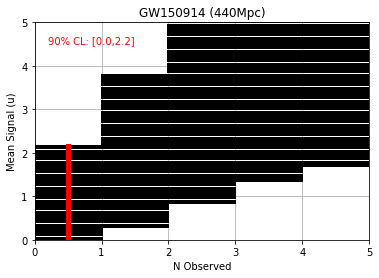

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures//calcFeldmanCousins_GW151012.pdf


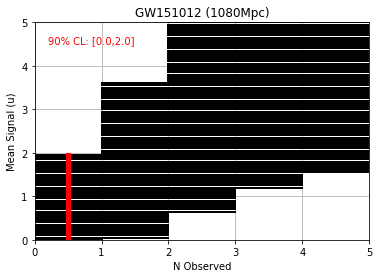

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures//calcFeldmanCousins_GW151226.pdf


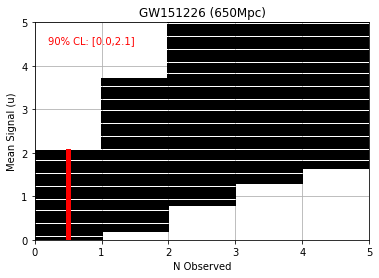

/Users/HAL9000/Dropbox (MIT)/KamLAND/Analyses/KamLAND-LIGO/iPython/Figures//calcFeldmanCousins_GW170104.pdf


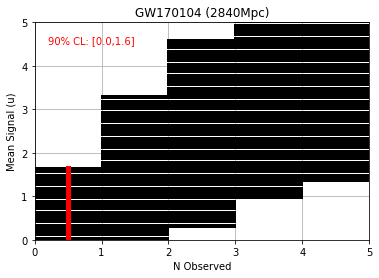

In [77]:
importlib.reload(KF)

# Setup some constants for the analysis
dataPaths         = KF.DataPaths('')      # set paths to look for information, like cross section tables. No data imported yet.
Const             = KF.Constants()        # Setup the physical constants, like average neutrino mass
Const.setSeed(1)                         # Set a seed for the random number generator, like generating random time stamps on the neutrinos.
Const.NeutrinoEmissionRange = [-500,500] 
Const.LiveTime    = 3600*24 # Set the analysis livetime
FitParameters     = KF.FitParameters()    # Setup the default systematic uncertainties.
KLZFit            = KF.KLZFit(dataPaths,Const,FitParameters) # make an object


# Generating a realization of neutrino events
neutrinopdf = np.exp(-KLZFit.Constants.NeutrinoCenterEnergies/3.) 
KLZFit.setNeutrinoEnergyPDF(neutrinopdf)
KLZFit.plotNeutrinoEnergyPDF(log = False)

realization = KLZFit.getNeutrinoRealization(Rate = 5/KLZFit.Constants.LiveTime)  # Rate is the expected neutrino rate. 
KLZFit.setNeutrinos(realization) # Set the realization as the data, [time, energy, -, +]


# Generate some GravitationalWaves, randomly assiging a time stamp. [time, distnace, -, +]
gravitationalWaves = np.asarray([
                    ['GW150914',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],440,-170,150,],
                    ['GW151012',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],1080,-490,550],
                    ['GW151226',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],650,-190,180],
                    ['GW170104',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],2840,-1360,1400],
                    ])

KLZFit.setGravitationalWaves(gravitationalWaves) # set the GW
KLZFit.plotAllEvents()

# Make a plot of the time of flight widows for all GWs
KLZFit.plotTOF()


# Determine the time windows for the search
KLZFit.calculateTimeRange(FitParameters) # Given the distance to GWs and the neutrion energies, set the time window.
KLZFit.plotInterestingEvents(axis2 = True)

# Spit out the FC range of allowed signal.
KLZFit.calcFeldmanCousins(plot = True,confidenceLevel=0.9) # This takes ~5s per GW to calculate.
l_limits = KLZFit.FCLowerLimits
u_limits = KLZFit.FCUpperLimits
# Once you have the confidence limits from the FeldmanCousins calculation. Convert to a fluence limit.


KLZFit.evalLLH()


Average Neutrino Energy in sample: 3.76MeV
Neutrino with energy less than 0.9MeV found. Removed. Energy: 
0.1322163969147887 MeV


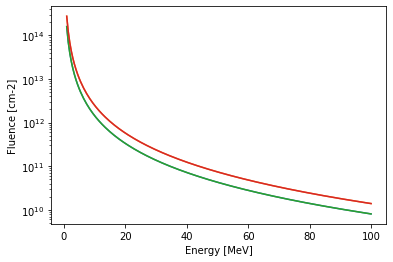

In [19]:
importlib.reload(KF)

# Setup some constants for the analysis
dataPaths         = KF.DataPaths('a') # set paths to look for information, like cross section tables. No data imported yet.
Const             = KF.Constants()    # Setup the physical constants, like average neutrino mass
Const.setSeed(21)                      # Set a seed for the random number generator, like generating random time stamps on the neutrinos.
Const.NeutrinoEmissionRange = [-500,500]
Const.LiveTime = 3600*24              # Set the analysis livetime
FitParameters     = KF.FitParameters()    # Setup the default systematic uncertainties.
KLZFit            = KF.KLZFit(dataPaths,Const,FitParameters) # make an object


# Generating a realization of neutrino events
bins        = KLZFit.Constants.NeutrinoCenterEnergies
neutrinopdf = np.exp(-bins/3.)# Replace this with the expected neutrino energy distribution.
KLZFit.setNeutrinoEnergyPDF(neutrinopdf)
realization = KLZFit.getNeutrinoRealization(Rate = 15/KLZFit.Constants.LiveTime)  # Rate is the expected neutrino rate. 
KLZFit.setNeutrinos(realization)# Set the realization as the data, [time, energy, -, +]

# Generate some GravitationalWaves, randomly assiging a time stamp. [time, distnace, -, +]
gravitationalWaves = np.asarray([['GW150914',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],440,-170,150,],
                    ['GW151012',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],1080,-490,550],
                    ['GW151226',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],650,-190,180],
                    ['GW170104',np.random.uniform(low=0, high=KLZFit.Constants.LiveTime, size=(1,))[0],2840,-1360,1400],
                    ])

KLZFit.setGravitationalWaves(gravitationalWaves) # set the GW
#KLZFit.plotAllEvents()

# Determine the time windows for the search
KLZFit.calculateTimeRange(FitParameters) # Given the distance to GWs and the neutrion energies, set the time window.
#KLZFit.plotInterestingEvents(axis2 = True)

KLZFit.FCLowerLimits = l_limits 
KLZFit.FCUpperLimits = u_limits 

KLZFit.calcFluence()


Text(0, 0.5, '')

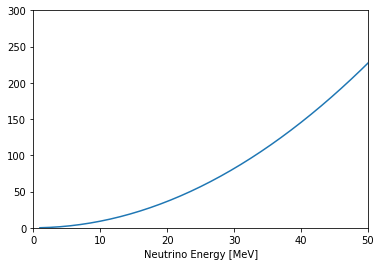

In [18]:
importlib.reload(gf)
# set a random seed



dataPaths         = gf.DataPaths('a') # set paths to look for information
Const             = gf.Constants()    # Setup the physical constants
Const.setSeed(6)
FitParameters     = gf.FitParameters()    # Setup the default systematic uncertainties.
golemfit          = gf.GolemFit(dataPaths,Const,FitParameters) #make an object

golemfit.Constants.LiveTime = 3600*2 # Set the livetime of the analysis.
livetime = golemfit.Constants.LiveTime

# Generating a realization of neutrino events
bins        = golemfit.Constants.NeutrinoCenterEnergies
neutrinopdf = np.exp(-bins/1)/sum(np.exp(-bins/1)) # Replace this with the expected neutrino energy distribution.
golemfit.setNeutrinoEnergyPDF(neutrinopdf)
realization = golemfit.getNeutrinoRealization(Rate = 3/livetime)  # Rate is the expected neutrino rate. 

# Set the realization as the data, [time, energy, -, +]
golemfit.setNeutrinos(realization)

# Generate some GravitationalWaves, randomly assiging a time stamp. [time, distnace, -, +]
gravitationalWaves = np.asarray([['GW150914',np.random.uniform(low=0, high=livetime, size=(1,))[0],440,-170,150,],
                    ['GW151012',np.random.uniform(low=0, high=livetime, size=(1,))[0],1080,-490,550],
                    ['GW151226',np.random.uniform(low=0, high=livetime, size=(1,))[0],650,-190,180],
                    ['GW170104',np.random.uniform(low=0, high=livetime, size=(1,))[0],2840,-1360,1400],
                    ])

golemfit.setGravitationalWaves(gravitationalWaves) # set the GW



golemfit.calculateTimeRange(FitParameters) # set the GW

print('Print out accidental coincidence rate expectation, probability of null observation.')
print('This should exclude event +/- 1000s around the GW events.')



# Make some plots
golemfit.plotFull()
#golemfit.plotEvents()
#golemfit.plotInterestingEvents()



FitParameters     = gf.FitParameters()    # Setup the default systematic uncertainties.
FitParameters.GWDistance = 3
FitParameters.NeutrinoEnergy = -3

golemfit.calculateTimeRange(FitParameters) # set the GW
golemfit.plotInterestingEvents()




golemfit.evalLLH()

TypeError: len() of unsized object

Print out accidental coincidence rate expectation, probability of null observation.
This should exclude event +/- 1000s around the GW events.


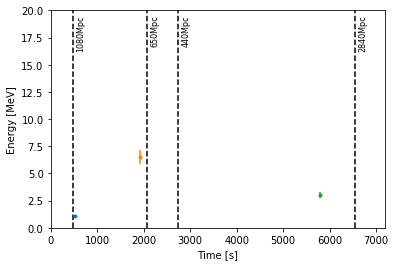

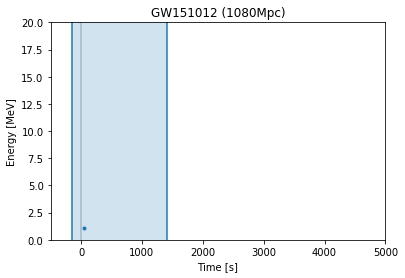

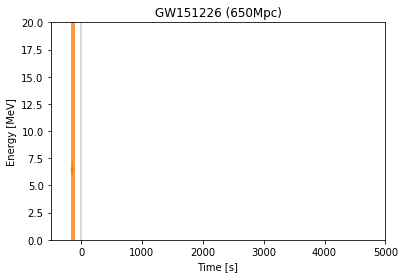

[1.8, 20, 0.01, 100000]

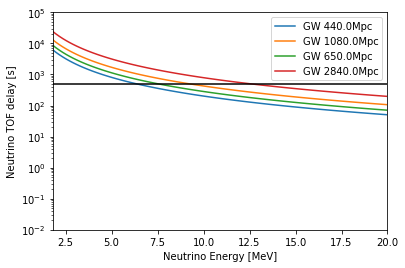

In [23]:
def neutrinoTimeOfFlight(distance_Mpc,Energy_MeV):
    #mn = 0.02
    mn = 1                              # Average mass of neutrions
    H0 = 67.3 * 1000/(3.08568e22)       # Hubble constant
    Ol = 0.73                           # Lambda constant
    Om =  0.27                          # Omega matter
    c = 299792458                       # Speed of light
    v = H0 *distance_Mpc * 3.08568e22;  # Velocity
    z = v/c                             # Red shift factor
    E = Energy_MeV*1e6                  # Neutrino energy
    const = mn**2/(2*H0*E**2)
    def func(x):
        return const * 1./((1+x)**2 * np.sqrt(Ol+Om*(1+x)**3))
    return quad(func, 0., z)[0] #Return the time of flight

import numpy as np
from scipy.integrate import quad

fig, ax1 = plt.subplots()
for distance in KLZFit.GravitationalWaves.Distance:
    x = np.linspace(1.8,20,100)
    y = []
    for i in range(len(x)):
        y.append(neutrinoTimeOfFlight(distance,x[i]))
    plt.plot(x,y,label = 'GW '+str(np.round(distance,1)) +'Mpc')
plt.ylabel('Neutrino TOF delay [s]')
plt.xlabel('Neutrino Energy [MeV]')
plt.plot([0,100],[500,500],'k')
plt.legend()
ax1.set_yscale('log')
plt.axis([1.8,20,0.01,100000])
plt.savefig(KLZFit.DataPaths.pdfLocation+'/calcFeldmanCousins_'+self.GravitationalWaves.Name[i]+'.pdf', format='pdf', dpi=200, bbox_inches='tight')
print(self.DataPaths.pdfLocation+'/calcFeldmanCousins_'+self.GravitationalWaves.Name[i]+'.pdf')

In [573]:


FitParameters     = gf.FitParameters()    # Setup the default systematic uncertainties.
FitParameters.GWDistance = 0
FitParameters.NeutrinoEnergy = 0
golemfit.calculateTimeRange(FitParameters) # set the GW


AttributeError: 'GolemFit' object has no attribute 'neutrinoTimeOfFlight'

0.9048374180359595
0.9048374180359623


[8.17346535e+01 1.64970297e+01 1.64653465e+00 1.14851485e-01
 6.93069307e-03]


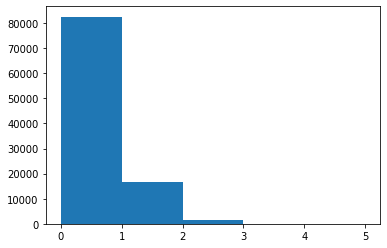

In [884]:
LLH = []

for i in range(1000):
    event_time_spacing = []
    b_rate = 0.000202
    while sum(event_time_spacing) < 1000:
        U = np.random.uniform(0, 1)
        event_time_spacing.append(-np.log(U)/rate)

    n_events.append(len(event_time_spacing)-1)
    #print(event_time_spacing)
    #print(len(event_time_spacing)-1)
    
c = plt.hist(n_events,bins = np.linspace(0,5,6))
print(c[0]*100/sum(c[0]))

In [922]:
#make trials for null hypothesis.
trials = []

time_window = 1000
b_rate = 0.000202
s_rate = np.arange(0,0.001,0.00001)

number_of_trials = 1000
for i in range(number_of_trials):
    event_time_spacing = []
    while sum(event_time_spacing) < 1000:
        U = np.random.uniform(0, 1)
        event_time_spacing.append(-np.log(U)/rate)
    trials.append(len(event_time_spacing)-1)



In [923]:
Null_to_BF_LLH = []


for t in trials:
    #print(t)
    LLH = []
    n_obs = t
    for i in range(len(s_rate)):
        #print(s_rate[i]*time_window)
        LLH.append(np.log10(scipy.stats.distributions.poisson.pmf(n_obs, (b_rate+s_rate[i])*time_window)))
    DLLH2 = []
    max_LLH  = max(LLH)
    max_LLH_index = np.where(LLH == max_LLH)[0][0]
    #print(t, s_rate[max_LLH_index]*time_window)#,s_rate[max_LLH_index+1]*time_window,)
    null_LLH = LLH[0]
    #best_fit_s_rate = s_rate[np.where(LLH == max_LLH)[0][0]]
    Null_to_BF_LLH.append(2*(max_LLH-null_LLH))



#print(Null_to_BF_LLH)
#for i in range(len(s_rate)):
#    DLLH2.append(-2* ( LLH[i] - LLH_max))

'''
plt.plot(s_rate*time_window,DLLH2)
plt.axhline(2.71)
plt.xlabel('signal events')
plt.ylabel('2DLLH')
plt.axis([0,max(s_rate*time_window),0,max(DLLH2)])
#print(LLH)

'''


"\nplt.plot(s_rate*time_window,DLLH2)\nplt.axhline(2.71)\nplt.xlabel('signal events')\nplt.ylabel('2DLLH')\nplt.axis([0,max(s_rate*time_window),0,max(DLLH2)])\n#print(LLH)\n\n"

(array([980.,   0.,  19.,   1.,   0.]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

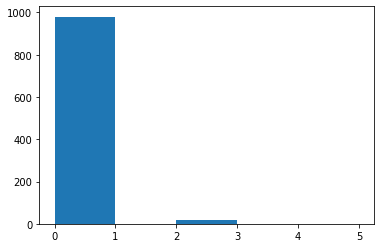

In [925]:
plt.hist(Null_to_BF_LLH,bins=np.linspace(0,5,6))

[0.0039933502757861705, 0.003977408778932058, 0.003961530920703259, 0.003945716447053704, 0.003929965104951478, 0.003914276642374769, 0.0038986508083078443, 0.0038830873527370235, 0.003867586026646685, 0.0038521465820152818]
0.0 5.73


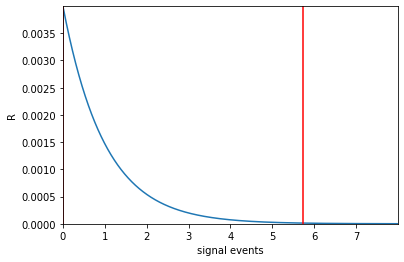

In [1031]:
from scipy.special import factorial
def Poisson(n,s,b):
    exp = s + b
    obs = n
    prob = np.power(exp,obs)*np.exp(-(exp))/factorial(obs)
    #print(scipy.stats.distributions.poisson.pmf(obs, exp))
    return prob
           


Null_to_BF_LLH = []


LH = []
n_obs = 0
time_window = 400

b_rate = 0.000202
s_rate = np.arange(0,0.02,0.00001)

for i in range(len(s_rate)):
    LH.append(scipy.stats.distributions.poisson.pmf(n_obs, (b_rate+s_rate[i])*time_window))

R       = []
max_LH  = max(LH)

for i in range(len(LH)):
    R.append((LH[i]/max_LH))
    
R = R/sum(R)

sorted_R, sorted_s = (list(t) for t in zip(*sorted(zip(R, s_rate),reverse=True)))

alpha = 0.9
sum_P = 0

accepted_values = []
rejected_values = []

for i in range(len(sorted_R)):
    sum_P += sorted_R[i]
    if sum_P > alpha:
        rejected_values.append(sorted_s[i]*1000.)
    else:
        accepted_values.append(sorted_s[i]*1000.)

plt.plot(s_rate*time_window, R)
plt.axvline(min(accepted_values),color = 'r')
plt.axvline(max(accepted_values),color = 'r')
print(min(accepted_values),max(accepted_values))

plt.xlabel('signal events')
plt.ylabel('R')
plt.axis([0,max(s_rate*time_window),0,max(R)])
plt.show()



In [815]:
print(scipy.stats.distributions.poisson.pmf(obs, 2.26))


0.00017999999999999998

In [779]:
 def neutrinoTimeOfFlight(distance_Mpc,Energy_MeV):
        mn = 0.2
        H0 = 67.3 * 1000/(3.08568e22)
        Ol = 0.7
        Om =  0.3
        c = 299000000
        v = H0 *distance_Mpc * 3.08568e22; 
        z = v/c
        E = Energy_MeV*1e6
        const = mn**2/(2*H0*E**2)
        def func(x):
            return const * 1./((1+x)**2 * np.sqrt(Ol+Om*(1+x)**3))
        return quad(func, 0., z)[0]
    
neutrinoTimeOfFlight(440,1.4)

412.32477903660026

In [62]:

golemfit.swallowNeutrinoEnergyDist()

<bound method GolemFit.swallowNeutrinoEnergyDist of <GolemFitPy.GolemFit object at 0x10ff4a908>>

In [42]:
golemfit.spitData

array([[0, 0, 0, 0]])

In [26]:
class Shout(object):
    def __init__(self, text):
        self.text = text

    def _repr_html_(self):
        return self.text

In [30]:
a = Shout('as')
a.__init__
print(a._repr_html_)

<bound method Shout._repr_html_ of <__main__.Shout object at 0x117c43a90>>


In [23]:
import sys

In [ ]:
rA = 10
nA = 1000
f1 = np.random.exponential(scale=rA, size=nA)
f1 = np.cumsum(f1)
data = []
for i in range(len(f1)):
    energy = np.random.normal(3,0.3,1)[0]
    data.append([f1[i],0.9*energy,energy,1.1*energy])
    
c,b = np.histogram(np.random.normal(3,10,1000),bins = np.linspace(0,100,101))

seconds_per_year = 3600*24*365
gravitationalWaves = np.asarray([[np.random.uniform(low=0, high=seconds_per_year, size=(1,))[0],440,-170,150],
                     [np.random.uniform(low=0, high=seconds_per_year, size=(1,))[0],1080,-490,550],
                     [np.random.uniform(low=0, high=seconds_per_year, size=(1,))[0],450,-190,180]]
                     )

print(gravitationalWaves)

0.2706705664732254
0.2706705664732254
0.00554421631499206 5.195000000000001


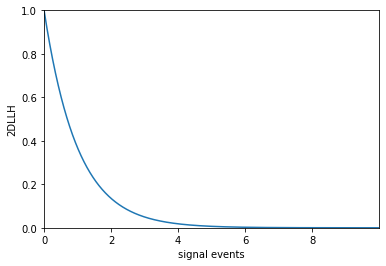

163.82043573454638


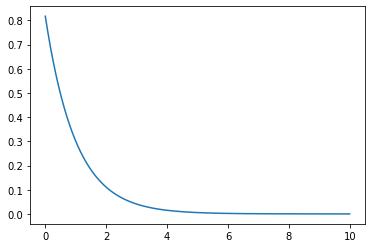

In [959]:
from scipy.special import factorial
def Poisson(n,s,b):
    exp = s + b
    obs = n
    prob = np.power(exp,obs)*np.exp(-(exp))/factorial(obs)
    #print(scipy.stats.distributions.poisson.pmf(obs, exp))
    return prob
           

    
Null_to_BF_LLH = []


LH = []
n_obs = 0
time_window = 1000
b_rate = 0.000202
s_rate = np.arange(0,0.01,0.000005)

for i in range(len(s_rate)):
    LH.append(scipy.stats.distributions.poisson.pmf(n_obs, (b_rate+s_rate[i])*time_window))
R = []
max_LH  = max(LH)

for i in range(len(s_rate)):
    R.append((LH[i]/max_LH))

sorted_R, sorted_s, sorted_LH = (list(t) for t in zip(*sorted(zip(R, s_rate, LH))))

alpha = 0.9
sum_P = 0
for i in range(len(sorted_R)):
    sum_P += sorted_LH[i]
    #print(sum_P)
    if sum_P > alpha:
        print(sorted_R[i], sorted_s[i]*time_window)#, sorted_LH[i])
        break
#print(sorted_DLH)

#print(np.cumsum(sorted_DLH))

plt.plot(s_rate*time_window,R)

#plt.plot(s_rate*time_window,np.cumsum(DLLH2))
plt.axhline(2.71)
plt.xlabel('signal events')
plt.ylabel('2DLLH')
plt.axis([0,max(s_rate*time_window),0,max(DLH)])
#print(LLH)
plt.show()

plt.plot(s_rate*time_window,LH)
print(sum(LH))

[0.9665968739119208, 0.9631482235251542, 0.8255556201644176, 0.7532923075728002, 0.7076191029980723, 0.6065306597126334, 0.47999766915860775, 0.2587479393537052, 0.12082581328866258, 0.04978003826252583, 0.018350210329605602, 0.006118433048003816, 0.001862749260237811, 0.0005217271364446758, 0.00013528586180980135, 3.266270525470718e-05, 7.376713944202025e-06, 1.5649511539128595e-06, 3.130456718505096e-07, 5.92304486802903e-08, 1.0632157033806659e-08, 1.8155131760456583e-09, 2.955617749443493e-10, 4.598018447093399e-11, 6.8488308997481935e-12]


ValueError: x and y must have same first dimension, but have shapes (260,) and (25,)

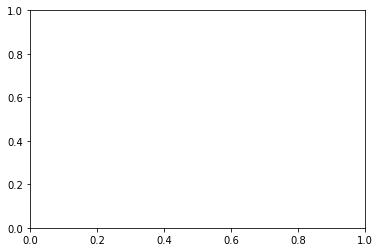

In [1083]:

from scipy.special import factorial
def Poisson(n,s,b):
    exp = s + b
    obs = n
    prob = np.power(exp,obs)*np.exp(-(exp))/factorial(obs)
    return prob
           
time_window = 1000
b_rate = 3

x = []
y1 = []
y2 = []

R = []
s_rate = np.linspace(0,25,260)

for n_obs in np.arange(0,25,1):
    x.append(n_obs)
    LLH = []
    hyp_LLH = scipy.stats.distributions.poisson.pmf(n_obs, b_rate+0.5)
    for i in range(len(s_rate)):
        LLH.append(scipy.stats.distributions.poisson.pmf(n_obs, (b_rate+s_rate[i])))
    
    max_LLH  = max(LLH)
    max_LLH_index = np.where(LLH == max_LLH)[0][0]
    R.append(hyp_LLH/max_LLH)

sorted_R, sorted_s = (list(t) for t in zip(*sorted(zip(R, s_rate),reverse=True)))

alpha = 0.9
sum_P = 0

accepted_values = []
rejected_values = []

for i in range(len(sorted_R)):
    sum_P += sorted_R[i]
    if sum_P > alpha:
        rejected_values.append(sorted_s[i])
    else:
        accepted_values.append(sorted_s[i])

plt.plot(s_rate, R)
y1.append(min(accepted_values))
y2.append(max(accepted_values))
plt.axvline(min(accepted_values),color = 'r')
plt.axvline(max(accepted_values),color = 'r')
#print(min(accepted_values),max(accepted_values))

plt.xlabel('signal events')
plt.ylabel('R')
plt.axis([0,max(s_rate),0,max(R)])
plt.show()


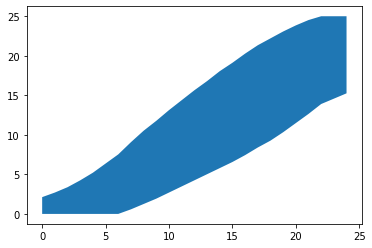

In [1077]:
plt.fill_between(x,y1,y2)